In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get our Training and Test Data
train = pd.read_csv('/content/drive/MyDrive/Dataset Sign Languange/sign_mnist_train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Dataset Sign Languange/sign_mnist_test.csv')

In [ ]:
# Inspect our Training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Get our training labels
labels = train['label'].values

In [ ]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

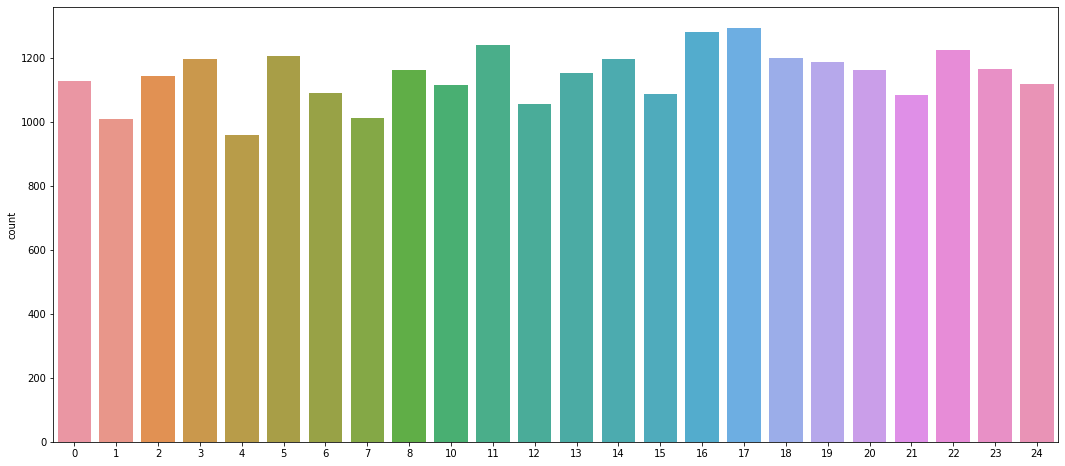

In [ ]:
# Plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [ ]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
# View our labels
labels
# len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


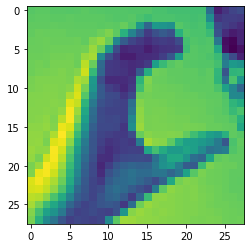

In [ ]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

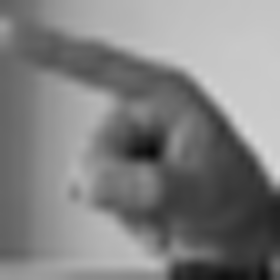

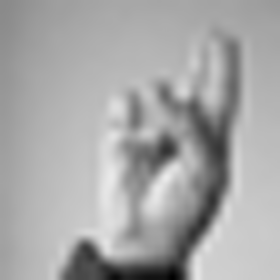

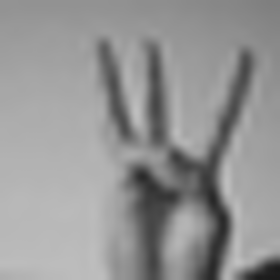

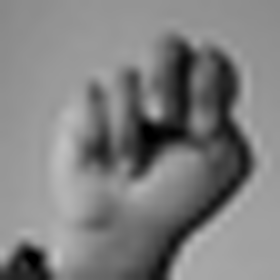

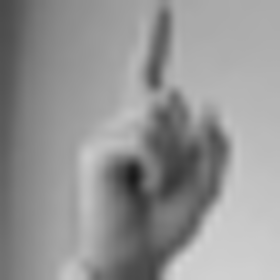

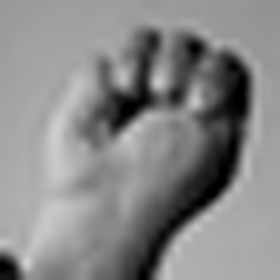

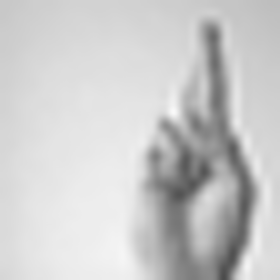

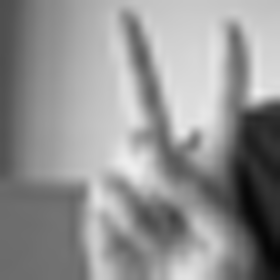

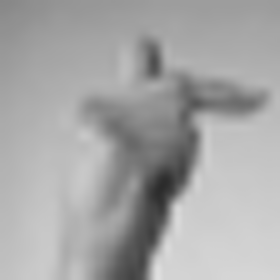

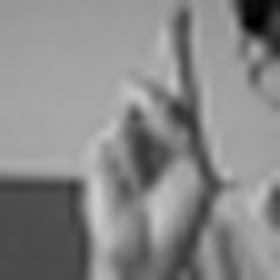

In [ ]:
# Use OpenCV to view 10 random images from our training data
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2_imshow(sample) #only take one argument
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [ ]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

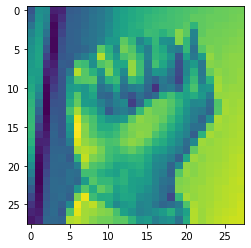

In [ ]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 30s 192ms/step - loss: 2.6882 - accuracy: 0.1887 - val_loss: 1.5799 - val_accuracy: 0.5025
Epoch 2/10
151/151 [==============================] - 29s 191ms/step - loss: 1.2122 - accuracy: 0.5957 - val_loss: 0.7659 - val_accuracy: 0.7565
Epoch 3/10
151/151 [==============================] - 29s 195ms/step - loss: 0.7148 - accuracy: 0.7593 - val_loss: 0.4790 - val_accuracy: 0.8533
Epoch 4/10
151/151 [==============================] - 30s 198ms/step - loss: 0.4982 - accuracy: 0.8318 - val_loss: 0.3340 - val_accuracy: 0.8972
Epoch 5/10
151/151 [==============================] - 31s 208ms/step - loss: 0.3516 - accuracy: 0.8810 - val_loss: 0.2155 - val_accuracy: 0.9384
Epoch 6/10
151/151 [==============================] - 31s 207ms/step - loss: 0.2477 - accuracy: 0.9184 - val_loss: 0.1370 - val_accuracy: 0.9669
Epoch 7/10
151/151 [==============================] - 31s 204ms/step - loss: 0.1785 - accuracy: 0.9453 - val_loss: 0.0950 - val_ac

In [ ]:
# Save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


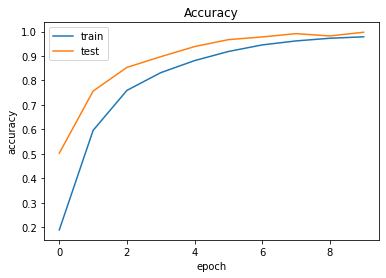

In [ ]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
# Reshape  test data yang kita dapat supaya bisa di evaluate perfomanya
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [ ]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8544339096486335

In [ ]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Test on Actual Webcam Input

In [ ]:
from IPython.display import clear_output, Image
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

video_capture = cv2.VideoCapture(VIDEO_SOURCE)
while video_capture.isOpened():
    success, frame = video_capture.read()

    clear_output(wait=True)
    img = arrayShow(frame)
    display(img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

NameError: ignored

In [ ]:
#cap = cv2.VideoCapture(0)
cap = "/content/photo.jpg"
while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2_imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2_imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

AttributeError: ignored